In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

In [16]:
def stationary_test(df):
    window_mean = df.rolling(window=10).mean()
    window_standard_deviation = df.rolling(window=10).std()
    plt.plot(df, color='black', label='log_ratio')
    plt.plot(window_mean, color='red', label='mean by 10')
    plt.plot(window_standard_deviation, color='blue',
             label='standard deviation by 10')
    plt.legend(loc='best')
    plt.title('Rolling Mean and standard deviation')
    plt.show()

    # Check using adftest
    result = adfuller(df)
    print('p :', result[1])  # if p<0.05 and
    # adf lower than critical values, reject null hypotheses, stationary
    print('adf statistic :', result[0])
    print('critical value :')
    for key, value in result[4].items():
        print(key, value)

In [ ]:
import os 
  
# current directory 
current_dir = os.getcwd() 
relative_path=os.path.abspath(os.path.join(current_dir, os.pardir))

In [17]:
ILR_data = pd.DataFrame(pd.read_csv(
    relative_path+"\\age_structure_data\\ILR_data.csv"))
SLR_data = pd.DataFrame(pd.read_csv(
    relative_path+"\\age_structure_data\\SLR_data.csv"))
SLR2_data = pd.DataFrame(pd.read_csv(
    relative_path+"\\age_structure_data\\SLR2_data.csv"))

In [18]:
ILR_data['Year'] = pd.to_datetime(ILR_data['Year'])
SLR_data['Year'] = pd.to_datetime(SLR_data['Year'])
SLR2_data['Year'] = pd.to_datetime(SLR2_data['Year'])
ILR_data =ILR_data.set_index("Year")
SLR_data =SLR_data.set_index("Year")
SLR2_data =SLR2_data.set_index("Year")

In [19]:
Transfomed_ILR_1=ILR_data['log_ratio_1']
Transfomed_ILR_2=ILR_data['log_ratio_2']

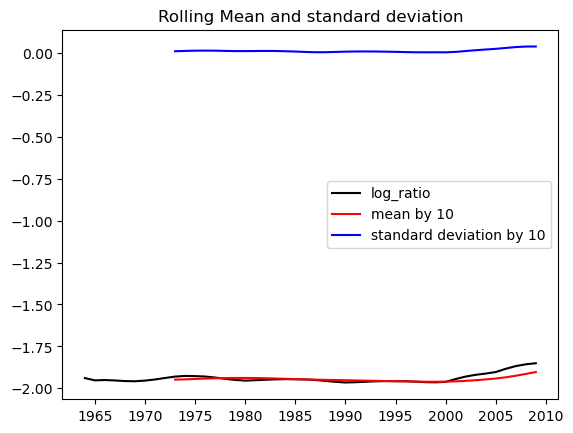

p : 0.1785318116159867
adf statistic : -2.2799023399081646
critical value :
1% -3.6327426647230316
5% -2.9485102040816327
10% -2.6130173469387756


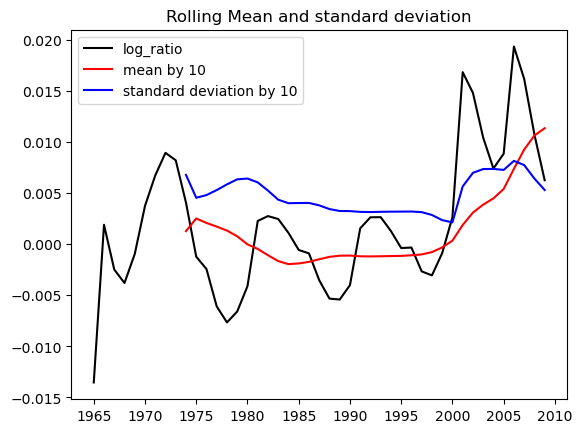

p : 0.9494167971800722
adf statistic : -0.10021818407397129
critical value :
1% -3.639224104416853
5% -2.9512301791166293
10% -2.614446989619377


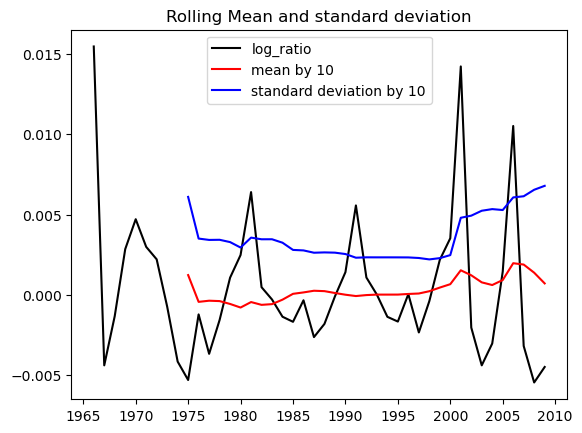

p : 0.7805320636634583
adf statistic : -0.9223236386124879
critical value :
1% -3.639224104416853
5% -2.9512301791166293
10% -2.614446989619377


In [20]:
stationary_test(Transfomed_ILR_1)

Transfomed_ILR_1_differenced = Transfomed_ILR_1-Transfomed_ILR_1.shift()
Transfomed_ILR_1_differenced.dropna(inplace=True)
stationary_test(Transfomed_ILR_1_differenced)

Transfomed_ILR_1_differenced2 = Transfomed_ILR_1_differenced-Transfomed_ILR_1_differenced.shift()
Transfomed_ILR_1_differenced2.dropna(inplace=True)
stationary_test(Transfomed_ILR_1_differenced2)

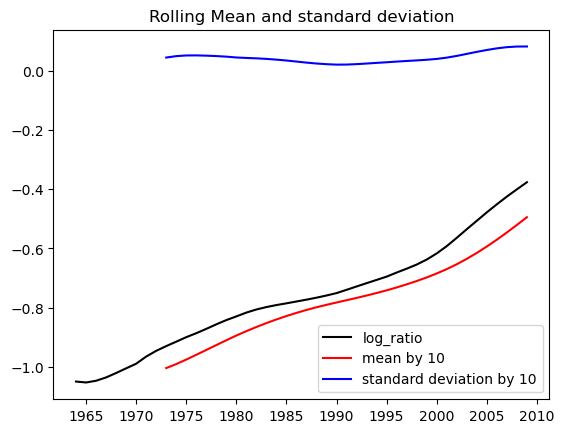

p : 0.9897025894001532
adf statistic : 0.6932694982397416
critical value :
1% -3.5925042342183704
5% -2.931549768951162
10% -2.60406594375338


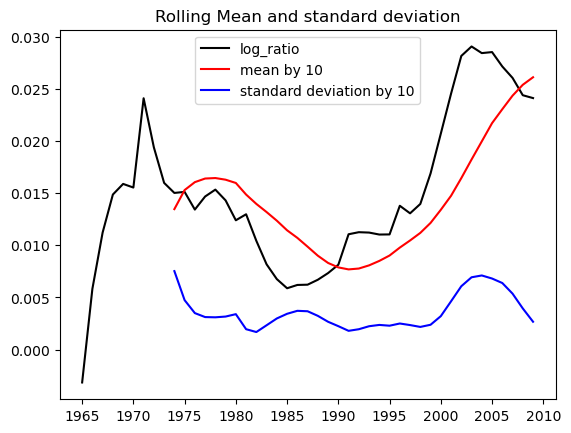

p : 0.5946959595290522
adf statistic : -1.373956740131144
critical value :
1% -3.5925042342183704
5% -2.931549768951162
10% -2.60406594375338


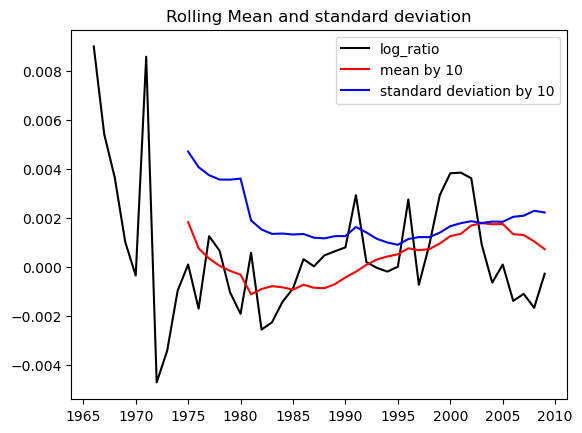

p : 2.709432080824147e-06
adf statistic : -5.44602276088663
critical value :
1% -3.5925042342183704
5% -2.931549768951162
10% -2.60406594375338


In [21]:
stationary_test(Transfomed_ILR_2)

Transfomed_ILR_2_differenced = Transfomed_ILR_2-Transfomed_ILR_2.shift()
Transfomed_ILR_2_differenced.dropna(inplace=True)
stationary_test(Transfomed_ILR_2_differenced)

Transfomed_ILR_2_differenced2 = Transfomed_ILR_2_differenced-Transfomed_ILR_2_differenced.shift()
Transfomed_ILR_2_differenced2.dropna(inplace=True)
stationary_test(Transfomed_ILR_2_differenced2)

In [22]:
SLR_e=SLR_data['log_ratio_e']
SLR_y=SLR_data['log_ratio_y']
SLR_k=SLR_data['log_ratio_k']

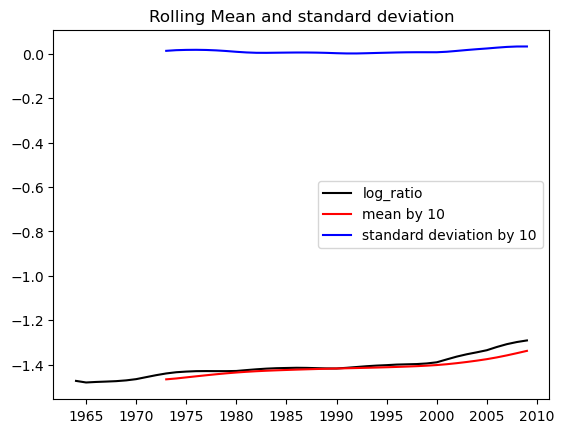

p : 0.9959221787390359
adf statistic : 1.190868044290548
critical value :
1% -3.6155091011809297
5% -2.941262357486514
10% -2.6091995013850418


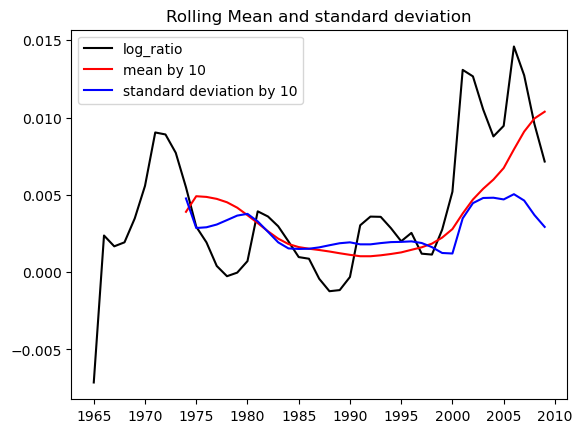

p : 0.7511287431470002
adf statistic : -1.0058389012944284
critical value :
1% -3.6155091011809297
5% -2.941262357486514
10% -2.6091995013850418


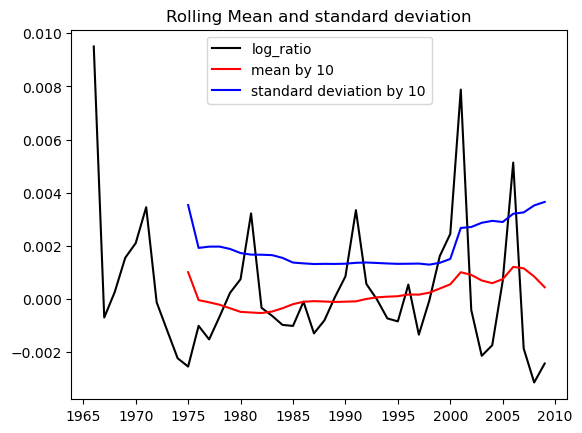

p : 0.6504277622082687
adf statistic : -1.2529183837020517
critical value :
1% -3.639224104416853
5% -2.9512301791166293
10% -2.614446989619377


In [23]:
stationary_test(SLR_e)

SLR_e_differenced = SLR_e-SLR_e.shift()
SLR_e_differenced.dropna(inplace=True)
stationary_test(SLR_e_differenced)

SLR_e_differenced2 = SLR_e_differenced-SLR_e_differenced.shift()
SLR_e_differenced2.dropna(inplace=True)
stationary_test(SLR_e_differenced2)

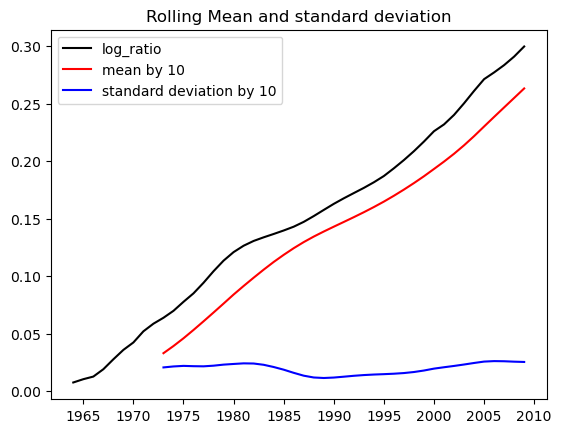

p : 0.9647595165428776
adf statistic : 0.08128014973670462
critical value :
1% -3.5925042342183704
5% -2.931549768951162
10% -2.60406594375338


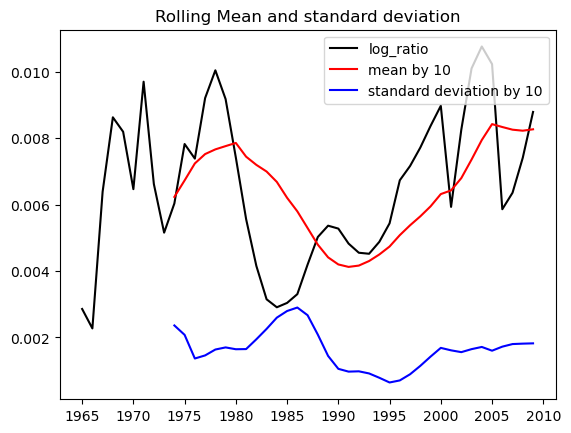

p : 0.018330694173032545
adf statistic : -3.2296613543380275
critical value :
1% -3.5925042342183704
5% -2.931549768951162
10% -2.60406594375338


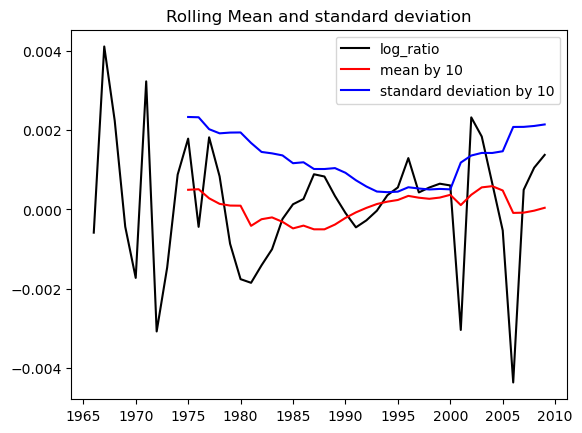

p : 1.2482638594799663e-07
adf statistic : -6.055463235944416
critical value :
1% -3.5925042342183704
5% -2.931549768951162
10% -2.60406594375338


In [24]:
stationary_test(SLR_y)

SLR_y_differenced = SLR_y-SLR_y.shift()
SLR_y_differenced.dropna(inplace=True)
stationary_test(SLR_y_differenced)

SLR_y_differenced2 = SLR_y_differenced-SLR_y_differenced.shift()
SLR_y_differenced2.dropna(inplace=True)
stationary_test(SLR_y_differenced2)

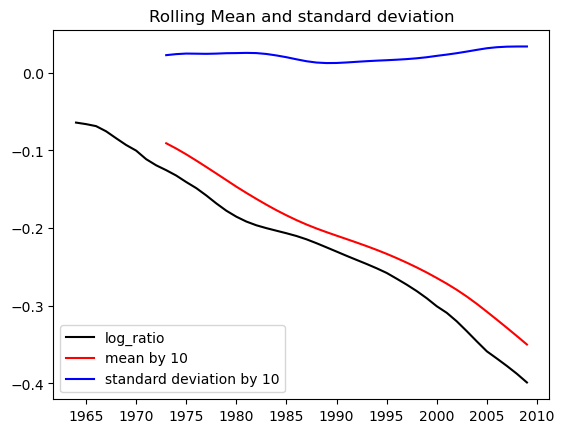

p : 0.9865766715867754
adf statistic : 0.5596127295551486
critical value :
1% -3.5925042342183704
5% -2.931549768951162
10% -2.60406594375338


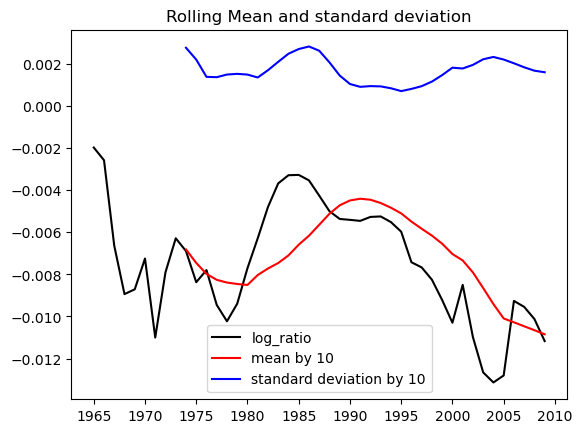

p : 0.1664725893138566
adf statistic : -2.31722545052144
critical value :
1% -3.5925042342183704
5% -2.931549768951162
10% -2.60406594375338


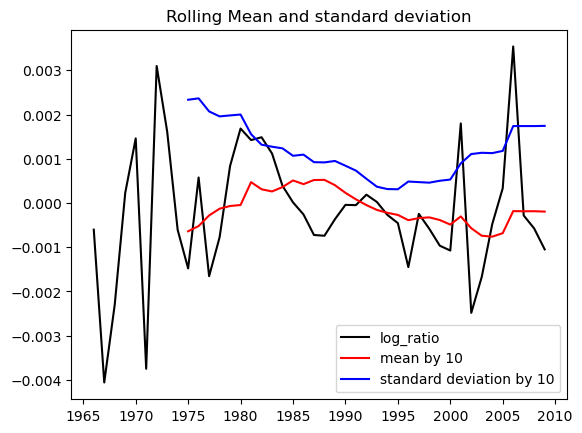

p : 3.0718426584285293e-07
adf statistic : -5.881429269757093
critical value :
1% -3.5925042342183704
5% -2.931549768951162
10% -2.60406594375338


In [25]:
stationary_test(SLR_k)

SLR_k_differenced = SLR_k-SLR_k.shift()
SLR_k_differenced.dropna(inplace=True)
stationary_test(SLR_k_differenced)

SLR_k_differenced2 = SLR_k_differenced-SLR_k_differenced.shift()
SLR_k_differenced2.dropna(inplace=True)
stationary_test(SLR_k_differenced2)

In [26]:
SLR_1=SLR2_data['log_ratio_1']
SLR_2=SLR2_data['log_ratio_2']

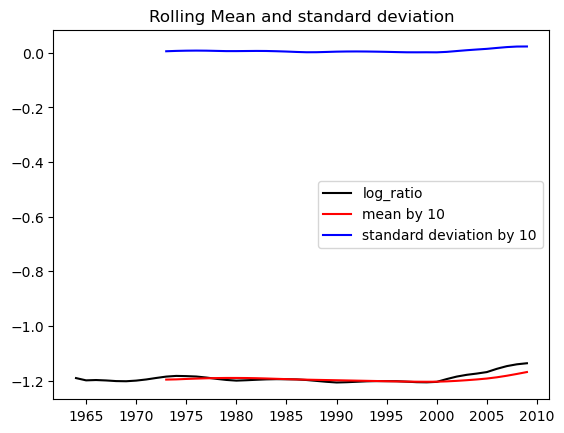

p : 0.17853181161592818
adf statistic : -2.2799023399083413
critical value :
1% -3.6327426647230316
5% -2.9485102040816327
10% -2.6130173469387756


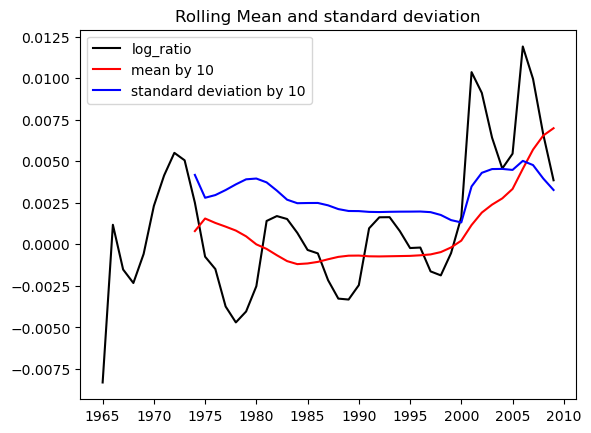

p : 0.949416797180078
adf statistic : -0.10021818407391277
critical value :
1% -3.639224104416853
5% -2.9512301791166293
10% -2.614446989619377


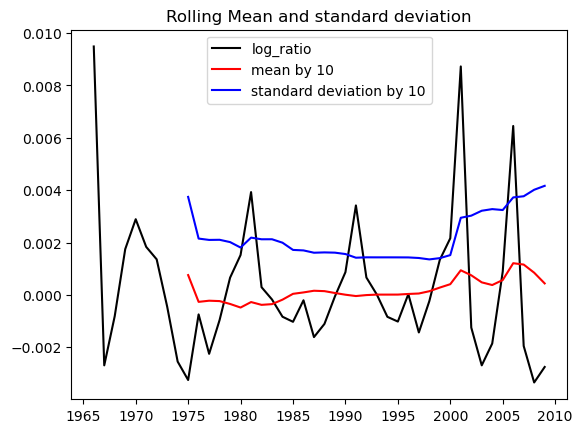

p : 0.7805320636634535
adf statistic : -0.9223236386125023
critical value :
1% -3.639224104416853
5% -2.9512301791166293
10% -2.614446989619377


In [28]:
stationary_test(SLR_1)

SLR_1_differenced = SLR_1-SLR_1.shift()
SLR_1_differenced.dropna(inplace=True)
stationary_test(SLR_1_differenced)

SLR_1_differenced2 = SLR_1_differenced-SLR_1_differenced.shift()
SLR_1_differenced2.dropna(inplace=True)
stationary_test(SLR_1_differenced2)

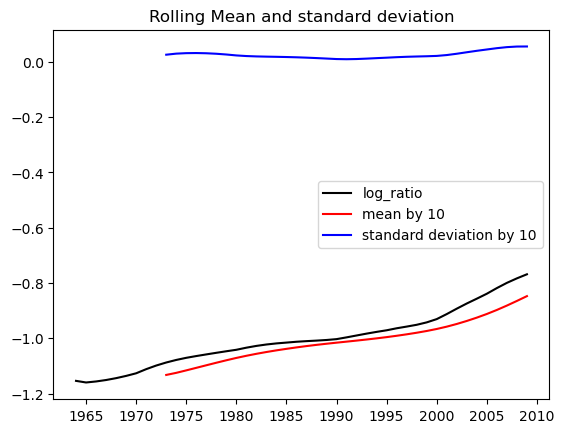

p : 0.9923546586526739
adf statistic : 0.8467592664250339
critical value :
1% -3.5925042342183704
5% -2.931549768951162
10% -2.60406594375338


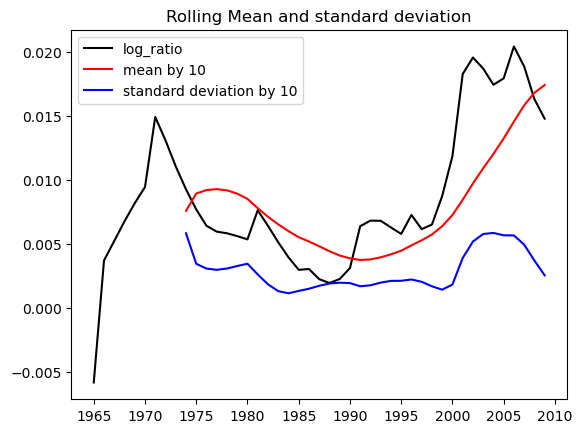

p : 0.5903861556227907
adf statistic : -1.38302583059846
critical value :
1% -3.5925042342183704
5% -2.931549768951162
10% -2.60406594375338


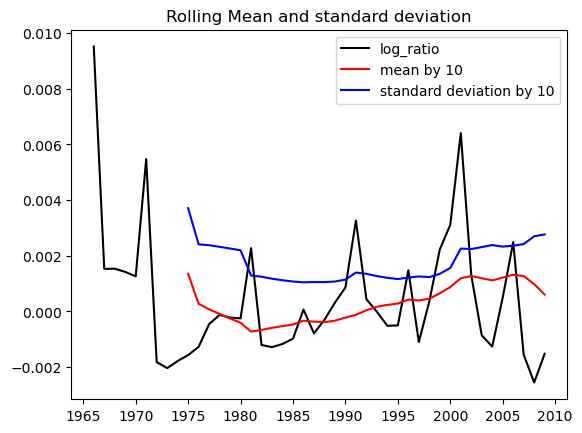

p : 0.6207965474163757
adf statistic : -1.3182187466637774
critical value :
1% -3.639224104416853
5% -2.9512301791166293
10% -2.614446989619377


In [30]:
stationary_test(SLR_2)

SLR_2_differenced = SLR_2-SLR_2.shift()
SLR_2_differenced.dropna(inplace=True)
stationary_test(SLR_2_differenced)

SLR_2_differenced2 = SLR_2_differenced-SLR_2_differenced.shift()
SLR_2_differenced2.dropna(inplace=True)
stationary_test(SLR_2_differenced2)